<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/05_Text_Mining_Document_Clustering%2C_Document_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/한경_토스뱅크_2024/01_Machine Learning/04_텍스트마이닝/data/topics"

In [ ]:
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 700)

In [ ]:
# glob을 활용해 데이터 디렉토리 내에 있는 .data 파일 불러오기
all_files = glob.glob(os.path.join(DATA_PATH, "*.data"))

# 파일 이름
file_names = []

# 내용
contents = []

for data_file in all_files:

  temp_df = pd.read_table(data_file, index_col=None, header=0, encoding='latin1')

  # 파일명 가져오기
  file_name = data_file.split("/")[-1]
  file_name = file_name.split(".")[0]

  # 파일명 리스트와 내용 리스트에 각각 내용을 저장
  file_names.append(file_name)
  contents.append(temp_df.to_string())

doc_df = pd.DataFrame({"filename" : file_names, "content": contents})
doc_df.head()

,filename,content
0,screen_netbook_1005ha,Keep in mind that once you get in a room full of light or step outdoors screen reflections could become annoying .\n0 I've used mine outsi...
1,interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh..."
2,free_bestwestern_hotel_sfo,The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n0 They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n1 ...
3,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ..."
4,eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa..."


문서의 주제
- 호텔
- 자동차
- IT기기

# 전처리

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

# 문장 한개에 대한 토큰화 처리 로직
def my_tokenizer(text):
  doc = nlp(text)
  return [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]

# TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=my_tokenizer, # tfidf에게 커스텀 토크나이저를 사용하도록 설정
    ngram_range=(1, 2),
    min_df = 0.05,
    max_df = 0.95
)

feature_vector = tfidf_vectorizer.fit_transform(doc_df['content'])
feature_vector

<51x5475 sparse matrix of type '<class 'numpy.float64'>'
	with 40076 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.cluster import KMeans

# 3개의 군집
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=42)
km_cluster.fit(feature_vector)

KMeans(max_iter=10000, n_clusters=3, random_state=42)

In [ ]:
# cluster 레이블 확인
cluster_labels = km_cluster.labels_
cluster_labels

array([0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0,
       0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 1], dtype=int32)

In [ ]:
# centroid 확인
cluster_centroids = km_cluster.cluster_centers_
cluster_centroids

array([[0.00117335, 0.00117335, 0.00117335, ..., 0.        , 0.00042688,
        0.        ],
       [0.00285515, 0.00285515, 0.00285515, ..., 0.00179301, 0.00741174,
        0.00143842],
       [0.00287498, 0.00287498, 0.00287498, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
doc_df['cluster_label'] = cluster_labels
doc_df.sort_values(by='cluster_label')

,filename,content,cluster_label
0,screen_netbook_1005ha,Keep in mind that once you get in a room full of light or step outdoors screen reflections could become annoying .\n0 I've used mine outsi...,0
32,keyboard_netbook_1005ha,", I think the new keyboard rivals the great hp mini keyboards .\n0 Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .\n1 The keyboard is now as good as t...",0
49,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",0
33,speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 , faster about 20% to 30% faster at running applications than my Vista , seriously\n1 ...",0
23,performance_netbook_1005ha,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One...",0
22,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,0
21,buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",0
34,features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",0
38,display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",0
16,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",0


# 군집 별 핵심 단어 추출하기


In [ ]:
# cluster_model : 군집 모델
# cluster_data : 데이터 프레임
# feature_names : 단어 목록
# cluster_num : 클러스터 개수
# top_n_features : 대표 단어 몇 개를 볼 것인지 결정

def get_cluster_details(cluster_model, cluster_data, feature_names, cluster_num, top_n_features=10):

  # top N feature, 파일 이름, feature tf-idf값
  cluster_details = {}

  # 군집의 센트로이드 좌표를 얻어내기
  cluster_centroid = cluster_model.cluster_centers_

  # centroid 좌표의 제일 큰 값이 그 군집의 핵심 단어
  center_features = cluster_centroid.argsort()[:, ::-1]

  #  각 군집 별 순환을 통해 핵심 단어, feature 값(tfidf값), 각 군집에 속해있는 파일이름 얻어내기
  for c_num in range(cluster_num):

    # 군집 별 데이터를 담아낼 준비
    cluster_details[c_num] = {}
    cluster_details[c_num]['cluster'] = c_num # 클러스터 번호 담기

    # 핵심 단어 목록 담아주기 (top N개)
    top_n_feature_indexes = center_features[c_num, :top_n_features]
    top_features = [ feature_names[idx] for idx in top_n_feature_indexes ]
    cluster_details[c_num]['top_features'] = top_features

    # 핵심이 되는 단어들의 tfidf값
    top_n_feature_values = cluster_centroid[c_num, top_n_feature_indexes].tolist()
    cluster_details[c_num]['top_feature_value'] = top_n_feature_values

    # 군집에 포함된 파일명 담아주기
    file_names = cluster_data[cluster_data['cluster_label'] == c_num]['filename']
    file_names = file_names.tolist()

    cluster_details[c_num]['filenames'] = file_names

  return cluster_details

In [ ]:
cluster_detail_info = get_cluster_details(
    cluster_model = km_cluster,
    cluster_data = doc_df,
    feature_names = tfidf_vectorizer.get_feature_names_out(), # get_feature_names_out : tfidf의 단어 목록
    cluster_num=3
)

pd.DataFrame(cluster_detail_info)

,0,1,2
cluster,0,1,2
top_features,"[screen, battery, keyboard, battery life, life, kindle, video, direction, feature, voice]","[room, hotel, service, staff, food, location, bathroom, clean, price, parking]","[interior, seat, mileage, comfortable, gas, gas mileage, transmission, car, performance, quality]"
top_feature_value,"[0.13164518124718505, 0.11656014630766633, 0.062272006123473785, 0.06177846569842762, 0.057169413098487006, 0.05497808378030133, 0.052833091199825814, 0.051768663139999366, 0.0500614589001406, 0.05003358397612463]","[0.26063301032402886, 0.19757836420572783, 0.1758058123276316, 0.14911209760337735, 0.12570028548772472, 0.12338129254048338, 0.07332449089770948, 0.06974511566128655, 0.060551761121751556, 0.055614694122531755]","[0.22305246585436997, 0.188970542996851, 0.1719313820593926, 0.1220969855807613, 0.11878932687600369, 0.11290839434599474, 0.10249272642480411, 0.09762331306326871, 0.09295950080989268, 0.08915442463334124]"
filenames,"[screen_netbook_1005ha, eyesight-issues_amazon_kindle, screen_garmin_nuvi_255W_gps, updates_garmin_nuvi_255W_gps, satellite_garmin_nuvi_255W_gps, navigation_amazon_kindle, fonts_amazon_kindle, voice_garmin_nuvi_255W_gps, directions_garmin_nuvi_255W_gps, battery-life_amazon_kindle, buttons_amazon_kindle, battery-life_ipod_nano_8gb, performance_netbook_1005ha, video_ipod_nano_8gb, keyboard_netbook_1005ha, speed_windows7, features_windows7, display_garmin_nuvi_255W_gps, price_amazon_kindle, screen_ipod_nano_8gb, size_asus_netbook_1005ha, accuracy_garmin_nuvi_255W_gps, speed_garmin_nuvi_255W_gps, sound_ipod_nano_8gb, battery-life_netbook_1005ha]","[free_bestwestern_hotel_sfo, bathroom_bestwestern_hotel_sfo, service_bestwestern_hotel_sfo, staff_bestwestern_hotel_sfo, rooms_swissotel_chicago, location_holiday_inn_london, service_swissotel_hotel_chicago, service_holiday_inn_london, location_bestwestern_hotel_sfo, price_holiday_inn_london, room_holiday_inn_london, staff_swissotel_chicago, rooms_bestwestern_hotel_sfo, food_holiday_inn_london, parking_bestwestern_hotel_sfo, food_swissotel_chicago]","[interior_toyota_camry_2007, seats_honda_accord_2008, mileage_honda_accord_2008, interior_honda_accord_2008, comfort_toyota_camry_2007, gas_mileage_toyota_camry_2007, transmission_toyota_camry_2007, quality_toyota_camry_2007, comfort_honda_accord_2008, performance_honda_accord_2008]"


# 문서 유사도
- 코사인 유사도 활용

In [ ]:
doc_list = ['맛있는 사과 사과 사과 바나나',
            '사과 사과 바나나 오렌지 멜론 사과',
            '이게 제가 할 일이에요? 사과']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
feature_vect_simple

<3x8 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(
    feature_vect_simple.toarray(),
    columns=tfidf_vect_simple.get_feature_names_out()
)

,맛있는,멜론,바나나,사과,오렌지,이게,일이에요,제가
0,0.460392,0.0000,0.350140,0.815745,0.0000,0.000000,0.000000,0.000000
1,0.000000,0.4182,0.318052,0.740987,0.4182,0.000000,0.000000,0.000000
2,0.000000,0.0000,0.000000,0.322745,0.0000,0.546454,0.546454,0.546454


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
similarity_pair

array([[1.        , 0.71581911, 0.26327739]])

2번 클러스터와 비슷한 문서를 찾기

In [ ]:
cluster_2_indexes = doc_df[doc_df['cluster_label']==2].index
cluster_2_indexes

Index([1, 5, 17, 20, 24, 25, 35, 36, 47, 48], dtype='int64')

In [ ]:
compair_docname = doc_df.iloc[cluster_2_indexes[0]]['filename']
compair_docname

'interior_toyota_camry_2007'

In [ ]:
similarity_pair = cosine_similarity(
    feature_vector[cluster_2_indexes[0]], # 기준으로 삼을 2번 클러스터의 문서의 벡터 추출
    feature_vector[cluster_2_indexes] # 클러스터 2번의 모든 문서의 벡터"들" 추출
)
print(similarity_pair)

[[1.         0.14359463 0.06523407 0.91701502 0.2775551  0.0938898
  0.04199678 0.21135266 0.25812581 0.11293861]]


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]
sorted_index

array([[3, 4, 8, 7, 1, 9, 5, 2, 6]])

In [ ]:
# 유사도가 큰 순으로 cluster_2_indexes 추출하여 재정렬
cluster2_sorted_indexes = cluster_2_indexes[sorted_index.reshape(-1)]
cluster2_sorted_indexes

Index([20, 24, 47, 36, 5, 48, 25, 17, 35], dtype='int64')

In [ ]:
# 실제 유사도를 정렬해서 가져오기
cluster2_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
cluster2_sim_value = cluster2_sim_value[1:] # 자기 자신 빼기
cluster2_sim_value

array([0.91701502, 0.2775551 , 0.25812581, 0.21135266, 0.14359463,
       0.11293861, 0.0938898 , 0.06523407, 0.04199678])

In [ ]:
cluster2_sim_df = pd.DataFrame()
cluster2_sim_df['filename'] = doc_df.iloc[cluster2_sorted_indexes]['filename']
cluster2_sim_df['similarity'] = cluster2_sim_value

print("클러스터 2번의 0번 문서와 가장 유사한 파일 이름 및 유사도: \n{}".format(cluster2_sim_df.iloc[0, :]))

클러스터 2번의 0번 문서와 가장 유사한 파일 이름 및 유사도: 
filename      interior_honda_accord_2008
similarity                      0.917015
Name: 20, dtype: object


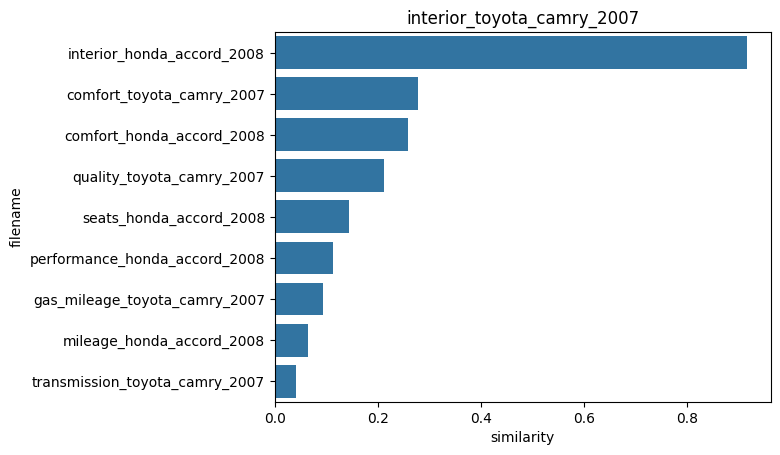

In [ ]:
sns.barplot(x='similarity', y='filename', data=cluster2_sim_df)
plt.title(compair_docname)
plt.show()